# Aritificial intelligence assignment 2024

In [379]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [380]:
# Parameters
img_height, img_width = 28, 28
batch_size = 32

# Pad naar dataset
dataset_path = './dataset'

In [381]:
# Data generators
datagen = ImageDataGenerator(rescale=(1 / 255), validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 208 images belonging to 26 classes.
Found 52 images belonging to 26 classes.


In [382]:
# Model bouwen
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D((2, 2)),
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D((2, 2)),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dense(train_generator.num_classes, activation='softmax')
#])

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\thimo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thimo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [383]:
# Model trainen
epochs = 12

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/12
1/7 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0625 - loss: 3.2325

C:\Users\thimo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.0417 - loss: 3.4865 - val_accuracy: 0.0385 - val_loss: 3.2756
Epoch 2/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0610 - loss: 3.2674 - val_accuracy: 0.0962 - val_loss: 3.2141
Epoch 3/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1655 - loss: 3.1647 - val_accuracy: 0.2308 - val_loss: 3.1356
Epoch 4/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2846 - loss: 3.0695 - val_accuracy: 0.3462 - val_loss: 3.0288
Epoch 5/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4659 - loss: 2.9090 - val_accuracy: 0.4231 - val_loss: 2.9001
Epoch 6/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5400 - loss: 2.7252 - val_accuracy: 0.4423 - val_loss: 2.7341
Epoch 7/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5760 - loss: 2.4864 - val_accuracy: 0.4615 - val_loss: 2.5450
Epoch 8/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6696 - loss: 2.2372 - val_accuracy: 0.5000 - val_loss: 2.3349
Epoch 9/12


In [384]:
# Model evalueren
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6442 - loss: 1.4542
Test nauwkeurigheid: 0.6538


In [385]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

Modelgrootte: 2.66 MB


In [386]:
# Voorspellingen maken en verwarringsmatrix berekenen
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Verwarringsmatrix:
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 

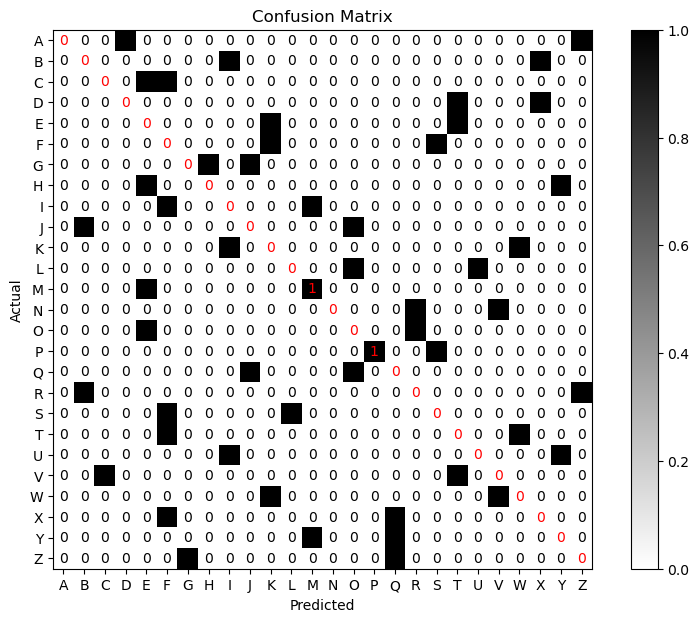

In [387]:
# Functie om cijfers naar letters om te zetten
def number_to_letter(n):
    return chr(n + ord('A'))

# Maak een lijst van letters voor de labels
labels = [number_to_letter(i) for i in range(26)]

# Omzetten naar pandas DataFrame met letters als labels
cm_df = pd.DataFrame(cm, index=labels[:len(np.unique(y_true))], columns=labels[:len(np.unique(y_true))])

# Functie om de celkleur aan te passen
def annotate_heatmap(data, row_labels, col_labels, ax=None,
                     cbar_kw=None, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    cbar_kw = cbar_kw or {}
    im = ax.imshow(data, **kwargs)

    # Markeer de hoofddiagonaal
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'red' if i == j else 'black'
            ax.text(j, i, format(data[i, j], 'd'),
                    ha="center", va="center",
                    color=color)
    
    return im

# Plot de heatmap met aangepaste annotaties
fig, ax = plt.subplots(figsize=(10, 7))
im = annotate_heatmap(cm, labels[:len(np.unique(y_true))], labels[:len(np.unique(y_true))],
                      ax=ax, cmap='binary')

# We zetten de labels en titel
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Zorg ervoor dat de labels correct worden ingesteld
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(labels[:len(np.unique(y_true))])
ax.set_yticklabels(labels[:len(np.unique(y_true))])

plt.colorbar(im, ax=ax)
plt.show()

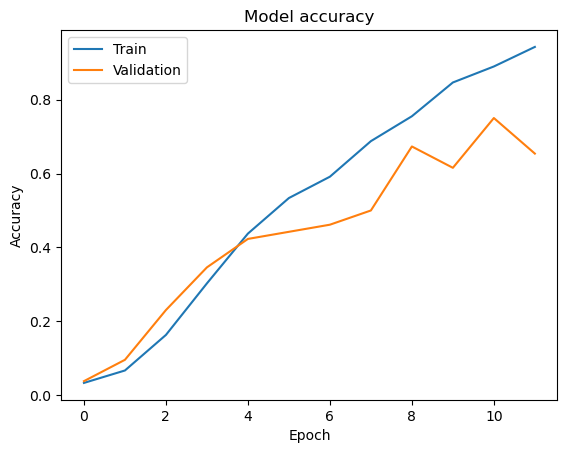

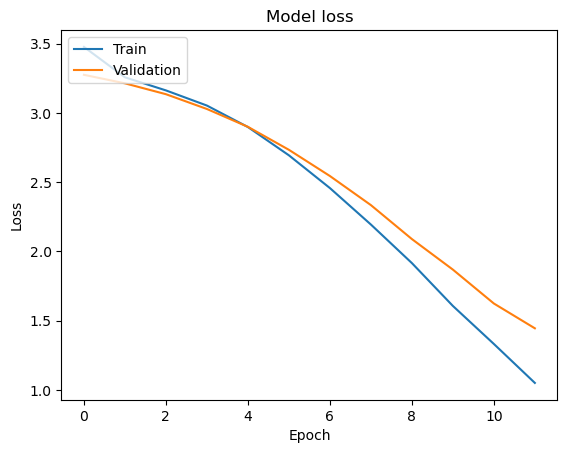

In [388]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()